<a href="https://colab.research.google.com/github/SamiraAsadzadeh/Neural-network-exercises/blob/main/Classification_RNN_GRU_LSTM_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **By: Samira Asadzadeh  40116341054541**

*   **Advisor:  Dr. Mr.Asadi**

*  **ISLAMIC AZAD UNIVERSITY SHIRAZ BRANCH Faculty of engineering**



In [ ]:
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from IPython.display import Image
from google.colab.patches import cv2_imshow
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [ ]:
def show_images(images: list) -> None:
    n: int = len(images)
    f = plt.figure()
    for i in range(n):
        f.add_subplot(1, n, i + 1)
        plt.imshow(images[i], cmap='gray')
    plt.show(block=True)

def show_image(image) -> None:
    plt.imshow(image, cmap='gray')
    plt.show(block=True)



# DataSet

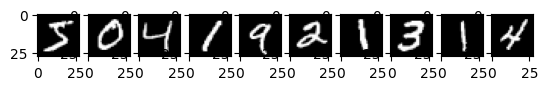

number of training images: 60000
number of test images: 10000


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#x_train.shape-->(60000, 28, 28)
# print out first 10 images in our training data
imgplot = show_images(x_train[0:10])

# check the size of our dataset
print("number of training images:",x_train.shape[0])
print("number of test images:",y_test.shape[0])

In [ ]:
# update all the training, testing dataset.
x_train, x_test = x_train/255.0, x_test/255.0
#x_validate, y_validate = x_test[:-10], y_test[:-10]
#x_test, y_test = x_test[-10:], y_test[-10:]

# **Model RNN**


In [ ]:
model = keras.Sequential()
model.add(layers.SimpleRNN(64, input_shape=(None, 28)))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10))
print(model.summary())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_9 (SimpleRNN)    (None, 64)                5952      
                                                                 
 batch_normalization_11 (Ba  (None, 64)                256       
 tchNormalization)                                               
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
Total params: 6858 (26.79 KB)
Trainable params: 6730 (26.29 KB)
Non-trainable params: 128 (512.00 Byte)
_________________________________________________________________
None


# **Model Compile**

In [ ]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="sgd",
    metrics=["accuracy"],
)


# **Model Train**

In [ ]:
model.fit(
    x_train, y_train, validation_data=(x_test, y_test), batch_size=64, epochs=10
)

Epoch 1/10
938/938 [==============================] - 19s 19ms/step - loss: 0.6575 - accuracy: 0.7976 - val_loss: 0.6940 - val_accuracy: 0.7631
Epoch 2/10
938/938 [==============================] - 19s 20ms/step - loss: 0.3236 - accuracy: 0.9054 - val_loss: 0.2825 - val_accuracy: 0.9181
Epoch 3/10
938/938 [==============================] - 17s 18ms/step - loss: 0.2484 - accuracy: 0.9269 - val_loss: 0.2192 - val_accuracy: 0.9357
Epoch 4/10
938/938 [==============================] - 17s 18ms/step - loss: 0.2096 - accuracy: 0.9388 - val_loss: 0.1785 - val_accuracy: 0.9471
Epoch 5/10
938/938 [==============================] - 17s 18ms/step - loss: 0.1860 - accuracy: 0.9449 - val_loss: 0.1671 - val_accuracy: 0.9515
Epoch 6/10
938/938 [==============================] - 19s 20ms/step - loss: 0.1699 - accuracy: 0.9492 - val_loss: 0.1717 - val_accuracy: 0.9487
Epoch 7/10
938/938 [==============================] - 17s 18ms/step - loss: 0.1542 - accuracy: 0.9544 - val_loss: 0.1352 - val_accuracy:

# **Model Evaluation**

In [ ]:
loss_ , acc = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss_)
print('Test accuracy:', acc)

Test loss: 0.1521139293909073
Test accuracy: 0.9549999833106995


# **Model Prediction**

In [ ]:
prediction = model.predict(x_test)
classes_x=np.argmax(prediction,axis=1)#این دستور خروجی پیش بینی شده را که به صورت یک آرایه هست را به یک عدد تبدیل می کند
print('Test prediction:', classes_x)

313/313 [==============================] - 1s 4ms/step
Test prediction: [7 2 1 ... 4 5 6]


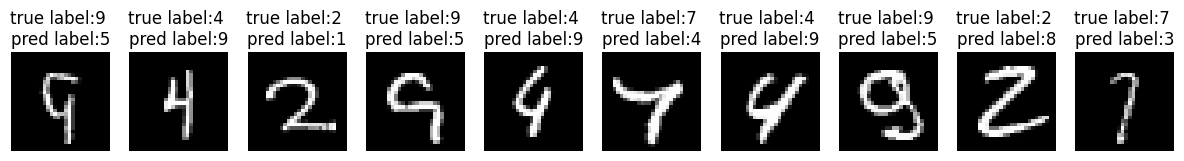

In [ ]:
(_, _), (x_test_image, y_test_label) = mnist.load_data()


b=0
f,axs = plt.subplots(1,10, figsize=(15, 15))

for t in range (len(y_test)):
  if b>=10:
    break
  if (classes_x[t] !=  y_test_label[t]):
    axs[b].imshow(x_test_image[t], cmap='gray')
    axs[b].set_title(f'true label:{y_test_label[t]} \n' f'pred label:{classes_x[t]}')
    axs[b].axis('off')

    b+=1


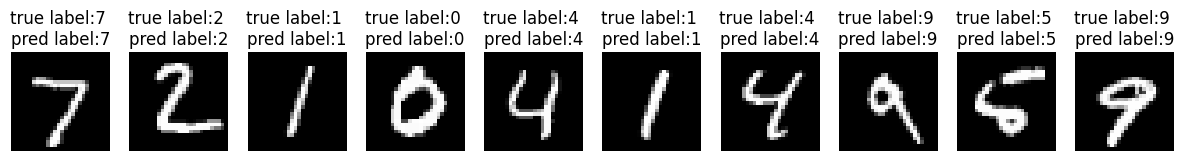

In [ ]:
b=0
f,axs = plt.subplots(1,10, figsize=(15, 15))

for t in range (len(y_test_label)):
  if b>=10:
    break
  if (classes_x[t] ==  y_test_label[t]):
    axs[b].imshow(x_test_image[t], cmap='gray')
    axs[b].set_title(f'true label:{y_test_label[t]} \n' f'pred label:{classes_x[t]}')
    axs[b].axis('off')

    b+=1


In [ ]:
def show_train_history(train_history):
    fig=plt.gcf()
    fig.set_size_inches(8, 4)
    plt.subplot(121)
    print(train_history.history.keys())

    if "accuracy" in train_history.history.keys():
        plt.plot(train_history.history["accuracy"])

    if "val_accuracy" in train_history.history.keys():
        plt.plot(train_history.history["val_accuracy"])

    plt.title("Train History")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(["train", "validation"], loc="upper left", fontsize="8")
    plt.subplot(122)

    if "loss" in train_history.history.keys():
        plt.plot(train_history.history["loss"])

    if "val_loss" in train_history.history.keys():
        plt.plot(train_history.history["val_loss"])

    plt.title("Train History")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["train", "validation"], loc="upper right", fontsize="8")
    plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


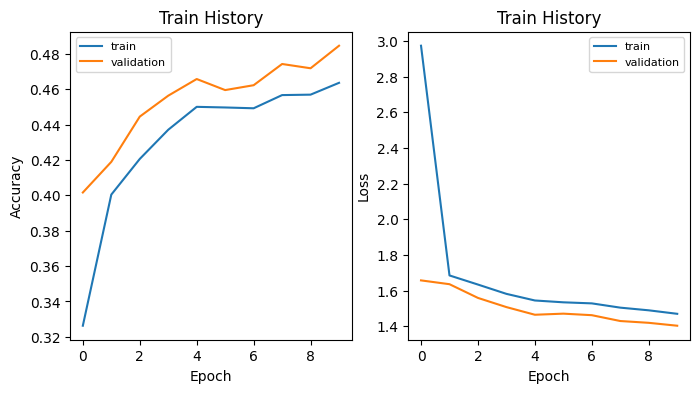

In [ ]:
#show train history
show_train_history(history)

In [ ]:
def plot_confusion_matrix(labels, pred_labels):

    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(1, 1, 1)
    cm = metrics.confusion_matrix(labels, pred_labels)
    cm = metrics.ConfusionMatrixDisplay(cm, display_labels=range(10))
    cm.plot(values_format='d', cmap='Blues', ax=ax)

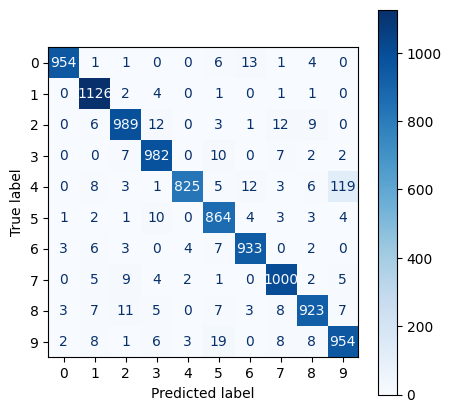

In [ ]:
plot_confusion_matrix(y_test_label,classes_x)

# **Model LSTM**


In [ ]:
model = keras.Sequential()
model.add(layers.LSTM(64, input_shape=(None, 28)))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10))
print(model.summary())

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                23808     
                                                                 
 batch_normalization_12 (Ba  (None, 64)                256       
 tchNormalization)                                               
                                                                 
 dense_12 (Dense)            (None, 10)                650       
                                                                 
Total params: 24714 (96.54 KB)
Trainable params: 24586 (96.04 KB)
Non-trainable params: 128 (512.00 Byte)
_________________________________________________________________
None


# **Model Compile**

In [ ]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="sgd",
    metrics=["accuracy"],
)


# **Model Train**

In [ ]:
model.fit(
    x_train, y_train, validation_data=(x_test, y_test), batch_size=64, epochs=10
)

Epoch 1/10
938/938 [==============================] - 8s 6ms/step - loss: 0.9620 - accuracy: 0.6914 - val_loss: 0.5527 - val_accuracy: 0.8190
Epoch 2/10
938/938 [==============================] - 6s 6ms/step - loss: 0.3835 - accuracy: 0.8838 - val_loss: 0.3902 - val_accuracy: 0.8717
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2566 - accuracy: 0.9234 - val_loss: 0.4818 - val_accuracy: 0.8434
Epoch 4/10
938/938 [==============================] - 6s 6ms/step - loss: 0.2043 - accuracy: 0.9382 - val_loss: 0.1761 - val_accuracy: 0.9440
Epoch 5/10
938/938 [==============================] - 5s 5ms/step - loss: 0.1749 - accuracy: 0.9467 - val_loss: 0.5553 - val_accuracy: 0.8107
Epoch 6/10
938/938 [==============================] - 5s 6ms/step - loss: 0.1538 - accuracy: 0.9532 - val_loss: 0.2033 - val_accuracy: 0.9318
Epoch 7/10
938/938 [==============================] - 6s 6ms/step - loss: 0.1394 - accuracy: 0.9585 - val_loss: 0.1284 - val_accuracy: 0.9599
Epoch 

# **Model Evaluation**

In [ ]:
loss_ , acc = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss_)
print('Test accuracy:', acc)

Test loss: 0.0961819738149643
Test accuracy: 0.9697999954223633


# **Model Prediction**

In [ ]:
prediction = model.predict(x_test)
classes_x=np.argmax(prediction,axis=1)#این دستور خروجی پیش بینی شده را که به صورت یک آرایه هست را به یک عدد تبدیل می کند
print('Test prediction:', classes_x)

313/313 [==============================] - 1s 2ms/step
Test prediction: [7 2 1 ... 4 5 6]


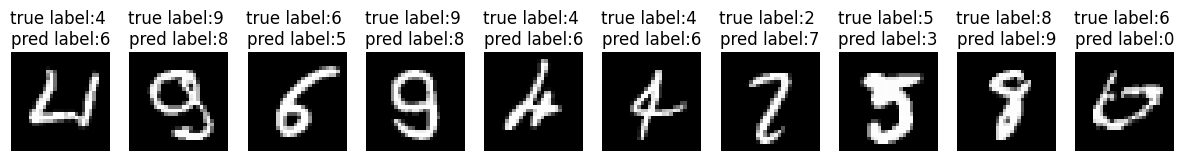

In [ ]:
(_, _), (x_test_image, y_test_label) = mnist.load_data()


b=0
f,axs = plt.subplots(1,10, figsize=(15, 15))

for t in range (len(y_test)):
  if b>=10:
    break
  if (classes_x[t] !=  y_test_label[t]):
    axs[b].imshow(x_test_image[t], cmap='gray')
    axs[b].set_title(f'true label:{y_test_label[t]} \n' f'pred label:{classes_x[t]}')
    axs[b].axis('off')

    b+=1


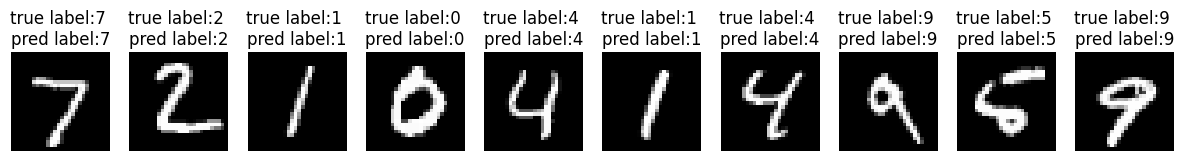

In [ ]:
b=0
f,axs = plt.subplots(1,10, figsize=(15, 15))

for t in range (len(y_test_label)):
  if b>=10:
    break
  if (classes_x[t] ==  y_test_label[t]):
    axs[b].imshow(x_test_image[t], cmap='gray')
    axs[b].set_title(f'true label:{y_test_label[t]} \n' f'pred label:{classes_x[t]}')
    axs[b].axis('off')

    b+=1


In [ ]:
def show_train_history(train_history):
    fig=plt.gcf()
    fig.set_size_inches(8, 4)
    plt.subplot(121)
    print(train_history.history.keys())

    if "accuracy" in train_history.history.keys():
        plt.plot(train_history.history["accuracy"])

    if "val_accuracy" in train_history.history.keys():
        plt.plot(train_history.history["val_accuracy"])

    plt.title("Train History")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(["train", "validation"], loc="upper left", fontsize="8")
    plt.subplot(122)

    if "loss" in train_history.history.keys():
        plt.plot(train_history.history["loss"])

    if "val_loss" in train_history.history.keys():
        plt.plot(train_history.history["val_loss"])

    plt.title("Train History")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["train", "validation"], loc="upper right", fontsize="8")
    plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


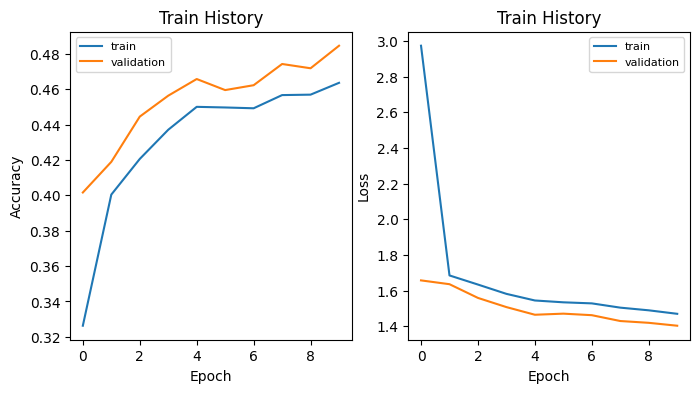

In [ ]:
#show train history
show_train_history(history)

In [ ]:
def plot_confusion_matrix(labels, pred_labels):

    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(1, 1, 1)
    cm = metrics.confusion_matrix(labels, pred_labels)
    cm = metrics.ConfusionMatrixDisplay(cm, display_labels=range(10))
    cm.plot(values_format='d', cmap='Blues', ax=ax)

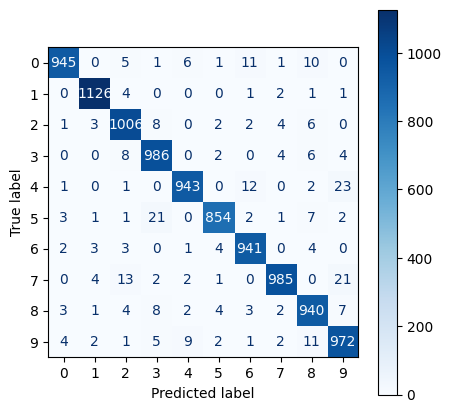

In [ ]:
plot_confusion_matrix(y_test_label,classes_x)

# **Model GRU**


In [ ]:
model = keras.Sequential()
model.add(layers.GRU(64, input_shape=(28, 28)))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10))
print(model.summary())

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 64)                18048     
                                                                 
 batch_normalization_13 (Ba  (None, 64)                256       
 tchNormalization)                                               
                                                                 
 dense_13 (Dense)            (None, 10)                650       
                                                                 
Total params: 18954 (74.04 KB)
Trainable params: 18826 (73.54 KB)
Non-trainable params: 128 (512.00 Byte)
_________________________________________________________________
None


# **Model Compile**

In [ ]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="sgd",
    metrics=["accuracy"],
)


# **Model Train**

In [ ]:
model.fit(
    x_train, y_train, validation_data=(x_test, y_test), batch_size=64, epochs=10
)

Epoch 1/10
938/938 [==============================] - 8s 7ms/step - loss: 1.4127 - accuracy: 0.5232 - val_loss: 1.0281 - val_accuracy: 0.6465
Epoch 2/10
938/938 [==============================] - 5s 6ms/step - loss: 0.8393 - accuracy: 0.7232 - val_loss: 0.6385 - val_accuracy: 0.7907
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.5366 - accuracy: 0.8308 - val_loss: 0.4508 - val_accuracy: 0.8410
Epoch 4/10
938/938 [==============================] - 6s 6ms/step - loss: 0.3748 - accuracy: 0.8834 - val_loss: 0.3028 - val_accuracy: 0.9050
Epoch 5/10
938/938 [==============================] - 5s 6ms/step - loss: 0.2939 - accuracy: 0.9102 - val_loss: 0.2826 - val_accuracy: 0.9083
Epoch 6/10
938/938 [==============================] - 6s 6ms/step - loss: 0.2441 - accuracy: 0.9261 - val_loss: 0.3472 - val_accuracy: 0.8765
Epoch 7/10
938/938 [==============================] - 5s 6ms/step - loss: 0.2081 - accuracy: 0.9367 - val_loss: 0.2150 - val_accuracy: 0.9309
Epoch 

# **Model Evaluation**

In [ ]:
loss_ , acc = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss_)
print('Test accuracy:', acc)

Test loss: 0.1290595829486847
Test accuracy: 0.9613000154495239


# **Model Prediction**

In [ ]:
prediction = model.predict(x_test)
classes_x=np.argmax(prediction,axis=1)#این دستور خروجی پیش بینی شده را که به صورت یک آرایه هست را به یک عدد تبدیل می کند
print('Test prediction:', classes_x)

313/313 [==============================] - 1s 2ms/step
Test prediction: [7 2 1 ... 4 5 6]


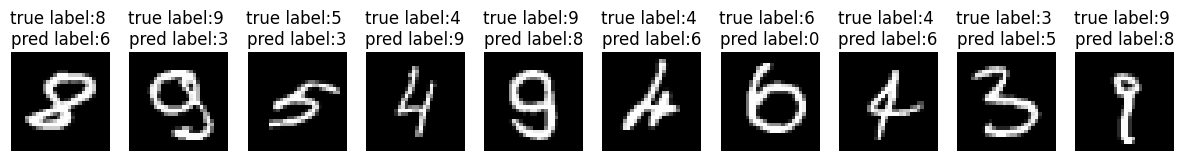

In [ ]:
(_, _), (x_test_image, y_test_label) = mnist.load_data()


b=0
f,axs = plt.subplots(1,10, figsize=(15, 15))

for t in range (len(y_test)):
  if b>=10:
    break
  if (classes_x[t] !=  y_test_label[t]):
    axs[b].imshow(x_test_image[t], cmap='gray')
    axs[b].set_title(f'true label:{y_test_label[t]} \n' f'pred label:{classes_x[t]}')
    axs[b].axis('off')

    b+=1


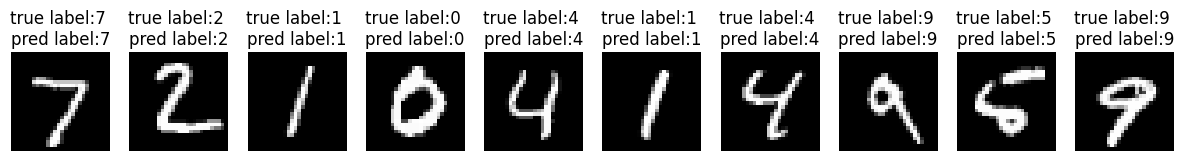

In [ ]:
b=0
f,axs = plt.subplots(1,10, figsize=(15, 15))

for t in range (len(y_test_label)):
  if b>=10:
    break
  if (classes_x[t] ==  y_test_label[t]):
    axs[b].imshow(x_test_image[t], cmap='gray')
    axs[b].set_title(f'true label:{y_test_label[t]} \n' f'pred label:{classes_x[t]}')
    axs[b].axis('off')

    b+=1


In [ ]:
def show_train_history(train_history):
    fig=plt.gcf()
    fig.set_size_inches(8, 4)
    plt.subplot(121)
    print(train_history.history.keys())

    if "accuracy" in train_history.history.keys():
        plt.plot(train_history.history["accuracy"])

    if "val_accuracy" in train_history.history.keys():
        plt.plot(train_history.history["val_accuracy"])

    plt.title("Train History")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(["train", "validation"], loc="upper left", fontsize="8")
    plt.subplot(122)

    if "loss" in train_history.history.keys():
        plt.plot(train_history.history["loss"])

    if "val_loss" in train_history.history.keys():
        plt.plot(train_history.history["val_loss"])

    plt.title("Train History")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["train", "validation"], loc="upper right", fontsize="8")
    plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


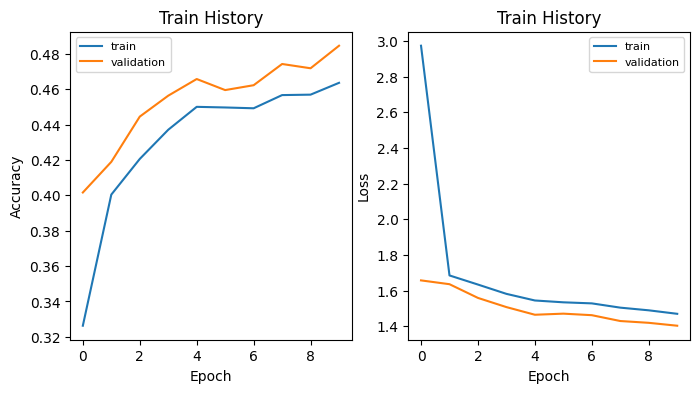

In [ ]:
#show train history
show_train_history(history)

In [ ]:
def plot_confusion_matrix(labels, pred_labels):

    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(1, 1, 1)
    cm = metrics.confusion_matrix(labels, pred_labels)
    cm = metrics.ConfusionMatrixDisplay(cm, display_labels=range(10))
    cm.plot(values_format='d', cmap='Blues', ax=ax)

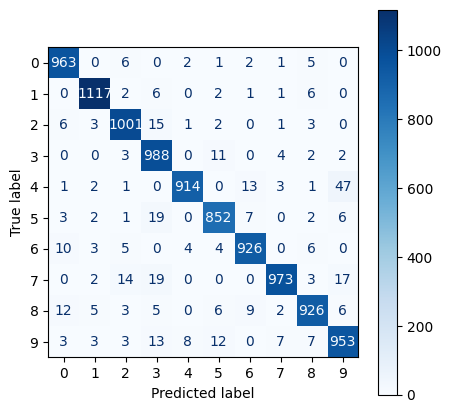

In [ ]:
plot_confusion_matrix(y_test_label,classes_x)